In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import scipy as sp
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heart = pd.read_excel("alldatasettowork.xlsx")
heart.columns = ['age', 'sex', 'chest_pain_type', 'rest_BP', 'cholesterol', 'fast_blood_sugar', 'rest_ECG', 'max_HR', 'ex_induced_angina', 
                  'ST_depression', 'st_slope', 'target']

In [6]:
heart.shape

(920, 12)

In [7]:
uniqueValues, occurCount = np.unique(heart.target, return_counts=True)
print(occurCount, uniqueValues)

[411 509] [0 1]


In [8]:
Y_Label = heart[['target']]
X_Data = heart.drop('target', axis=1)
X_Data = X_Data.values
Y_Label= Y_Label.astype("int").values

In [9]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
kf = StratifiedKFold(n_splits=10, shuffle=False)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical

In [11]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=100            #random initializer
n_dots=50
##########################################################


def plot_confusionMatrix(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output -visualization of correalation matrix of
  input data 
  '''
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
  plt.title("Confusion Matrix of all features")
  sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell. 
              linecolor="black")                              #Color of the lines that will divide each cell.            
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show() 



############################################################

############################################################

#data plot on different input condition 
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  '''
  Parameters :
  Input - 
  data - It is the pandas type variable
  Pair_plot - for pair plot visualization of input  data  
  Dist_Plot- for gaussian distribution plot visualization of input  data  
  Plot_violinplot- for violin plot visualization of input  data  
  Plot_confusionMatrix -for confusion matrix visualization of input  data   
  
  Output - dataframe with outleir rejection
  filled with Input parameter

  '''
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)


############################################################




def metrics (y_true, y_pred, probas_):


  '''
  Parameters :
  Input - 
  y_true - true  value of input data    
  y_pred- predicted  value of input data  
  probas_- probability/confidence of predicted output

  return -True Negative(tn),False Positive(fp),False Negative(fn)
  True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
  True positive rate(tpr)

  '''


  points=n_dots*'-'
  print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  #  aucs.append(roc_auc)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  f1=f1_score(y_true, y_pred)

  return  tn, fp, fn, tp, roc_auc, fpr, tpr, f1

############################################################


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  '''
  Parameters :
  mean_fpr - Mean False positive rate
  tprs -values of true positive rate
  aucs  - values of auc
  TP    - True positive 
  TN    - True Negative
  FP    - False Positiv
  FN    - False Negative

  Output - 
  Visalization of TPR vs FPR plot
  '''
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  # plt.grid(True)
  plt.show()
   
############################################################

def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
  
  '''
  Parameters :
  Input - 
  fpr - False positive rate
  tpr - True positive rate
  roc_auc -auc values of roc curve

  Output - 
  Visalization of current roc curve

  '''
  plt.plot(fpr,
          
          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)
   
############################################################

   
def Build_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  '''
  Parameters :
  Input - 
  X_Train -train data 
  Y_Train - label/output of train data
  tuned_parameters =parameters of models
  verbose = condition about model

  Output - 
  Returned a tuned classifier using grid search
  '''
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
############################################################

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  '''
  Parameters :
  Input - 
  aucs= values of aucs
  Accuracy - value of accuracy
  TP  - True Positive
  TN  - True Negative
  FP  - False Positive
  FN  - False Negative


  Output - 
  It prints the average aucs,accuarcy,confusion matrix
  '''

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)
    
############################################################
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


In [12]:
# define the hyper parameters of LOGIT
penalty=['l1', 'l2', 'elasticnet']
C=[0.2,0.3, 0.6, 0.8, 1]
solver =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
############################################
tuned_parameters_logit = [ {'penalty':penalty,
                         'C':C,
                         'solver':solver}]
###########################################
tuned_parameters_dt = {'criterion': ['gini','entropy'],          # define parameters of DecisionTree
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }
#########################################
tuned_parameters_rf = [{'criterion': ['gini','entropy'],
                          'n_estimators':[50,100,150,200,250]}]        # define parameters of RandomForestClassifier
##################################################  

var_smoothing = [1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10,1e-11,1e-12]

tuned_parameters_nb = [{'var_smoothing': var_smoothing}]         # define parameters of Naive Bais
##########################################################################
# define the hyper parameters of kNN
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
leaf_size = [5,10,15,20,25,30,35,40,45,50]
Distance = [1,2]

tuned_parameters_knn = [ {'n_neighbors': n_neighbors,                         #define parameters with different algorithm
                        'algorithm' : ['brute'],
                        'p':Distance},

                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},

                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]
##########################################################
  # define parameters of SVM
tuned_parameters_svm = {'C':[0.3, 0.6, 0.8, 1],
                        'kernel':['linear','rbf', 'sigmoid'], 'gamma' : ['scale', 'auto']}
##########################################################################
# define parameters of adaboost
tuned_parameters_ab = { 'algorithm': ['SAMME','SAMME.R'],'learning_rate':[0.1,0.5,1.0],'n_estimators': [10,50,100,200]}

##########################################################################
 # define parameters of XGBClassifier
tuned_parameters_xb = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.5, 1.0],
                       'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5,6,7,8,9,10,11,12,13]}

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.79      0.76      0.78        50

    accuracy                           0.76        92
   macro avg       0.76      0.76      0.76        92
weighted avg       0.76      0.76      0.76        92


Area Under ROC (AUC): 0.8390476190476189

Confusion Matrix for current fold: 
[[32 10]
 [12 38]]

Accuracy for Current Fold: 0.7608695652173914

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        41
           1       0.85      0.69      0.76        51

    accuracy                           0.76        92
   macro avg       0.77      0.77      0.76        92
weighted avg       0.78      0.76      0.76        92

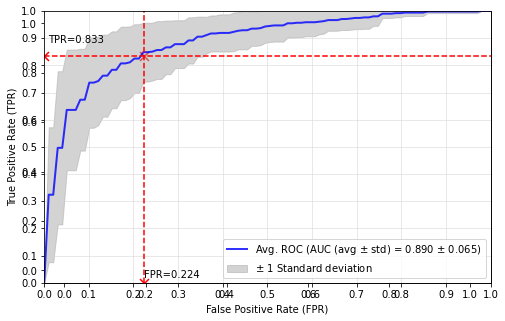


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.890 +/- 0.065
Accuracy (Avg. +/- Std.) is  0.808 +/- 0.084
Avg. CM is [[42, 9], [8, 31]]
Total for all folds CM is [[424, 92], [85, 319]]
Sensitivity (Avg. +/- Std.) is  0.833 +/- 0.128
Specificity (Avg. +/- Std.) is  0.776 +/- 0.219
Precision (Avg. +/- Std.) is  0.845 +/- 0.110
FOR (Avg. +/- Std.) is  0.179 +/- 0.114
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.827 +/- 0.074
Best Performing model parameters {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [13]:
##### LOGISTIC REGRESSION#############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    
    clf_lr= Build_Model (classifier = LogisticRegression(),                     #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_logit,
                      verbose=0)
    
    
    tn, fp, fn, tp, roc_auc, fpr, tpr, f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_lr.predict(X_Test),
                                                probas_ = clf_lr.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_lr.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
    
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_lr.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        42
           1       0.79      0.60      0.68        50

    accuracy                           0.70        92
   macro avg       0.71      0.70      0.70        92
weighted avg       0.72      0.70      0.69        92


Area Under ROC (AUC): 0.7138095238095239

Confusion Matrix for current fold: 
[[34  8]
 [20 30]]

Accuracy for Current Fold: 0.6956521739130435

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.66      0.93      0.77        41
           1       0.91      0.61      0.73        51

    accuracy                           0.75        92
   macro avg       0.78      0.77      0.75        92
weighted avg       0.80      0.75      0.75        92

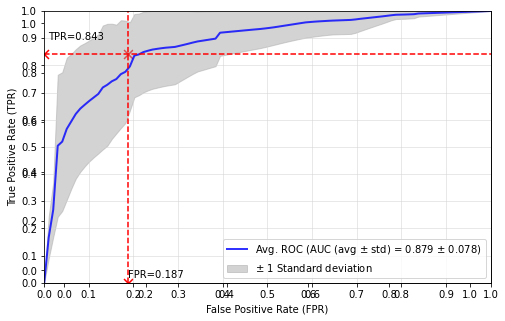


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.879 +/- 0.078
Accuracy (Avg. +/- Std.) is  0.829 +/- 0.081
Avg. CM is [[42, 7], [8, 33]]
Total for all folds CM is [[429, 77], [80, 334]]
Sensitivity (Avg. +/- Std.) is  0.842 +/- 0.139
Specificity (Avg. +/- Std.) is  0.813 +/- 0.128
Precision (Avg. +/- Std.) is  0.856 +/- 0.084
FOR (Avg. +/- Std.) is  0.169 +/- 0.124
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.841 +/- 0.086
Best Performing model parameters {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 0.1, 'splitter': 'best'}


In [14]:
##### Decision TREEs #############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_dt = Build_Model (classifier = DecisionTreeClassifier(random_state=random_initializer),       #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_dt,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr,f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_dt.predict(X_Test),
                                                probas_ = clf_dt.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_dt.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1) 
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_dt.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.70      0.71      0.71        42
           1       0.76      0.74      0.75        50

    accuracy                           0.73        92
   macro avg       0.73      0.73      0.73        92
weighted avg       0.73      0.73      0.73        92


Area Under ROC (AUC): 0.8061904761904762

Confusion Matrix for current fold: 
[[30 12]
 [13 37]]

Accuracy for Current Fold: 0.7282608695652174

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        41
           1       0.87      0.65      0.74        51

    accuracy                           0.75        92
   macro avg       0.77      0.76      0.75        92
weighted avg       0.78      0.75      0.75        92

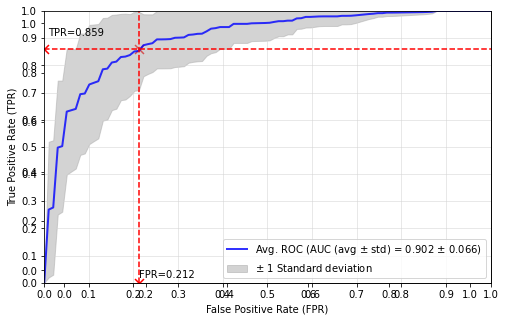


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.902 +/- 0.066
Accuracy (Avg. +/- Std.) is  0.827 +/- 0.087
Avg. CM is [[43, 8], [7, 32]]
Total for all folds CM is [[437, 87], [72, 324]]
Sensitivity (Avg. +/- Std.) is  0.858 +/- 0.122
Specificity (Avg. +/- Std.) is  0.789 +/- 0.176
Precision (Avg. +/- Std.) is  0.848 +/- 0.103
FOR (Avg. +/- Std.) is  0.158 +/- 0.118
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.845 +/- 0.081
Best Performing model parameters {'criterion': 'gini', 'n_estimators': 100}


In [15]:
##### RANDOM FOREST#############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_rf = Build_Model (classifier = RandomForestClassifier(random_state=random_initializer),       #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_rf,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr, f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_rf.predict(X_Test),
                                                probas_ = clf_rf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_rf.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_rf.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        42
           1       0.83      0.70      0.76        50

    accuracy                           0.76        92
   macro avg       0.77      0.77      0.76        92
weighted avg       0.77      0.76      0.76        92


Area Under ROC (AUC): 0.8266666666666667

Confusion Matrix for current fold: 
[[35  7]
 [15 35]]

Accuracy for Current Fold: 0.7608695652173914

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        41
           1       0.87      0.67      0.76        51

    accuracy                           0.76        92
   macro avg       0.78      0.77      0.76        92
weighted avg       0.79      0.76      0.76        92

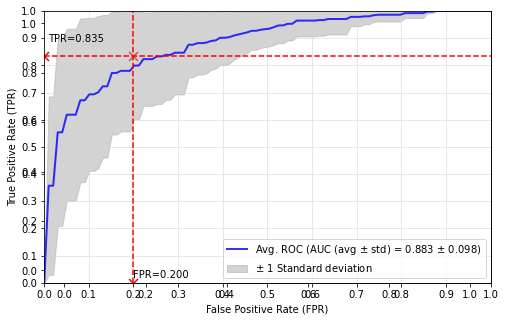


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.883 +/- 0.098
Accuracy (Avg. +/- Std.) is  0.820 +/- 0.113
Avg. CM is [[42, 8], [8, 32]]
Total for all folds CM is [[425, 82], [84, 329]]
Sensitivity (Avg. +/- Std.) is  0.835 +/- 0.158
Specificity (Avg. +/- Std.) is  0.800 +/- 0.222
Precision (Avg. +/- Std.) is  0.858 +/- 0.115
FOR (Avg. +/- Std.) is  0.175 +/- 0.134
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.834 +/- 0.106
Best Performing model parameters {'var_smoothing': 1e-05}


In [16]:
##### NAIVE BAYES#############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_nb = Build_Model (classifier = GaussianNB(),       #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_nb,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr,f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_nb.predict(X_Test),
                                                probas_ = clf_nb.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_nb.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_nb.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.51      0.76      0.61        42
           1       0.66      0.38      0.48        50

    accuracy                           0.55        92
   macro avg       0.58      0.57      0.55        92
weighted avg       0.59      0.55      0.54        92


Area Under ROC (AUC): 0.6469047619047619

Confusion Matrix for current fold: 
[[32 10]
 [31 19]]

Accuracy for Current Fold: 0.5543478260869565

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        41
           1       0.94      0.61      0.74        51

    accuracy                           0.76        92
   macro avg       0.80      0.78      0.76        92
weighted avg       0.82      0.76      0.76        92

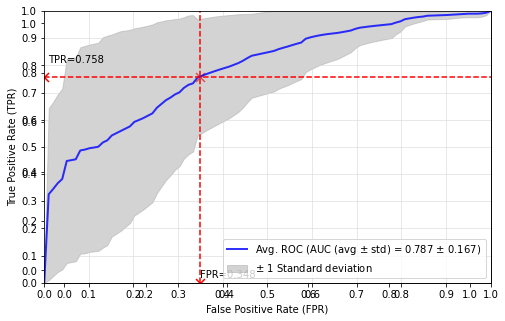


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.787 +/- 0.167
Accuracy (Avg. +/- Std.) is  0.711 +/- 0.114
Avg. CM is [[38, 14], [12, 26]]
Total for all folds CM is [[386, 143], [123, 268]]
Sensitivity (Avg. +/- Std.) is  0.758 +/- 0.219
Specificity (Avg. +/- Std.) is  0.652 +/- 0.227
Precision (Avg. +/- Std.) is  0.746 +/- 0.111
FOR (Avg. +/- Std.) is  0.269 +/- 0.189
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.731 +/- 0.130
Best Performing model parameters {'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 35, 'p': 1}


In [17]:
########### kNN ########
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_knn = Build_Model (classifier = KNeighborsClassifier(),                     #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_knn,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr, f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_knn.predict(X_Test),
                                                probas_ = clf_knn.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_knn.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
    
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_knn.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        42
           1       0.80      0.78      0.79        50

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92


Area Under ROC (AUC): 0.8276190476190477

Confusion Matrix for current fold: 
[[32 10]
 [11 39]]

Accuracy for Current Fold: 0.7717391304347826

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.85      0.67      0.75        51

    accuracy                           0.75        92
   macro avg       0.76      0.76      0.75        92
weighted avg       0.77      0.75      0.75        92

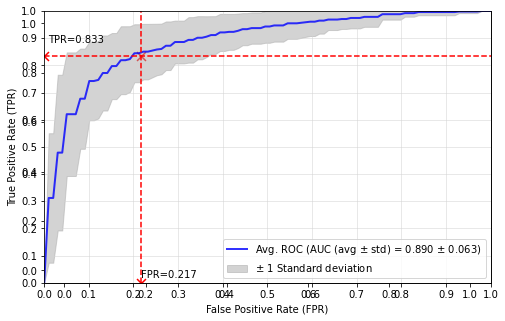


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.890 +/- 0.063
Accuracy (Avg. +/- Std.) is  0.811 +/- 0.081
Avg. CM is [[42, 8], [8, 32]]
Total for all folds CM is [[424, 89], [85, 322]]
Sensitivity (Avg. +/- Std.) is  0.833 +/- 0.120
Specificity (Avg. +/- Std.) is  0.784 +/- 0.215
Precision (Avg. +/- Std.) is  0.850 +/- 0.109
FOR (Avg. +/- Std.) is  0.180 +/- 0.110
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.830 +/- 0.069
Best Performing model parameters {'C': 0.3, 'gamma': 'scale', 'kernel': 'linear'}


In [18]:
##### SVM #############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_svm = Build_Model (classifier = SVC(random_state=random_initializer,probability=True),#create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_svm,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr, f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_svm.predict(X_Test),
                                                probas_ = clf_svm.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_svm.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_svm.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        42
           1       0.79      0.66      0.72        50

    accuracy                           0.72        92
   macro avg       0.72      0.72      0.72        92
weighted avg       0.73      0.72      0.72        92


Area Under ROC (AUC): 0.7966666666666666

Confusion Matrix for current fold: 
[[33  9]
 [17 33]]

Accuracy for Current Fold: 0.717391304347826

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.71      0.88      0.78        41
           1       0.88      0.71      0.78        51

    accuracy                           0.78        92
   macro avg       0.79      0.79      0.78        92
weighted avg       0.80      0.78      0.78        92


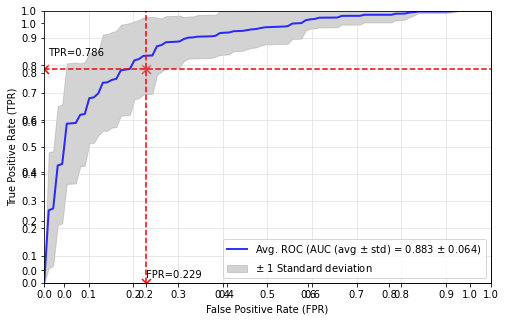


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.883 +/- 0.064
Accuracy (Avg. +/- Std.) is  0.779 +/- 0.076
Avg. CM is [[40, 9], [10, 31]]
Total for all folds CM is [[400, 94], [109, 317]]
Sensitivity (Avg. +/- Std.) is  0.786 +/- 0.162
Specificity (Avg. +/- Std.) is  0.771 +/- 0.199
Precision (Avg. +/- Std.) is  0.833 +/- 0.098
FOR (Avg. +/- Std.) is  0.219 +/- 0.121
DOR (Avg. +/- Std.) is  38.833 +/- 35.401
F1 Score (Avg. +/- Std.) is  0.792 +/- 0.085
Best Performing model parameters {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 10}


In [19]:
##### ADA BOOST #############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = [] 
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_ab = Build_Model (classifier = AdaBoostClassifier(random_state=random_initializer),#create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_ab,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr, f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_ab.predict(X_Test),
                                                probas_ = clf_ab.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_ab.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_ab.best_params_) 

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        42
           1       0.74      0.68      0.71        50

    accuracy                           0.70        92
   macro avg       0.70      0.70      0.70        92
weighted avg       0.70      0.70      0.70        92


Area Under ROC (AUC): 0.7666666666666667

Confusion Matrix for current fold: 
[[30 12]
 [16 34]]

Accuracy for Current Fold: 0.6956521739130435

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        41
           1       0.94      0.61      0.74        51

    accuracy                           0.76        92
   macro avg       0.80      0.78      0.76        92
weighted avg       0.82      0.76      0.76        92

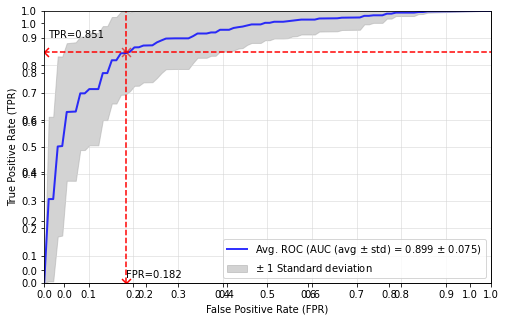


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.899 +/- 0.075
Accuracy (Avg. +/- Std.) is  0.836 +/- 0.088
Avg. CM is [[43, 7], [7, 33]]
Total for all folds CM is [[433, 75], [76, 336]]
Sensitivity (Avg. +/- Std.) is  0.850 +/- 0.137
Specificity (Avg. +/- Std.) is  0.818 +/- 0.162
Precision (Avg. +/- Std.) is  0.865 +/- 0.099
FOR (Avg. +/- Std.) is  0.158 +/- 0.126
DOR (Avg. +/- Std.) is  inf +/- nan
F1 Score (Avg. +/- Std.) is  0.849 +/- 0.087
Best Performing model parameters {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 1.0}


In [20]:
##### XG BOOST #############
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = [] 
F1=[]
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


    
for train_index, test_index in kf.split(X_Data,Y_Label):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Label[train_index], Y_Label[test_index]              #test data and label
    # print (X_Train.shape, Y_Train.shape)
    # print (X_Test.shape, Y_Test.shape)
    
    clf_xb = Build_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", use_label_encoder=False,
                                                       eval_metric = 'error',random_state=random_initializer),#create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_xb,
                      verbose=0)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr, f1 = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf_xb.predict(X_Test),
                                                probas_ = clf_xb.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf_xb.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
    F1.append(f1)
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print("F1 Score (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(F1),np.std(F1)))
print("Best Performing model parameters", clf_xb.best_params_) 